<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/2_level_no_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in power


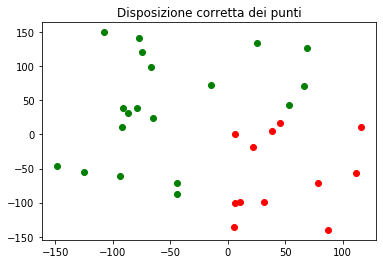

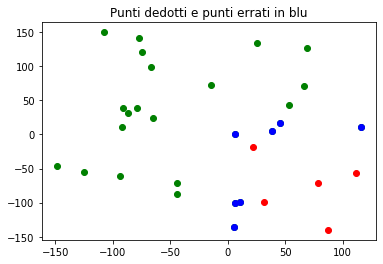

errori totali= 7 su 30 % 23.333333333333332


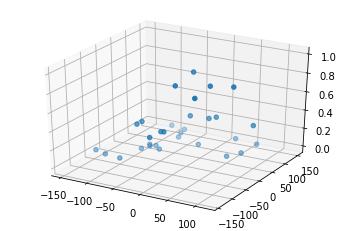

In [70]:
import matplotlib.pyplot as plt
import random
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


@np.vectorize
def generaPunti(n):
    l=[]
    for i in range(0, n+1):
        x = random.random()*300-150
        y = random.random()*300-150
        l.append([x,y])
    return l
def posizione(punto,xa,xb,ya,yb):
    #if (punto[0]>xa and punto[0]<xb and punto[1]>ya and punto[1]<yb):
    if (punto[0]>xa and  punto[1]<yb):
    #if (punto[0]>xa):
      formato = 'ro'
      out=1
    else:
      formato = 'go'
      out=0
    return out,formato

def posizione_neurale(p):
    if p>0.5:
      formato = 'ro'
      out=1
    else:
      formato = 'go'
      out=0
    return out,formato



def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

'''
Creo matrice dei pesi. Input sono 3, x1,x2 e x3 che è BIAS. Il vettore X ha dimensioni 1x3. Lo strato hidden è composto da 4 uscite, y1,y2,y3 e y4 ed è rappresentato dal vettore Y di dimensioni 4x1
Il vettore Y, di dimensioni 4x1 è il risultato del prodotto Wih.dot.X La matrice Wih ha dimensioni 4x3. Y=Wih.dot.X (4x1=4x3.dot.3x1)
L'output Z ha dimensioni 1. La matrice dei pesi da Y a Z,matrice Who,  ha dimensione 1x4. L'output Z ha dimensioni 1x1. Per questo Z=Who.dot.Y (1x1=1x4.dot.4x1)  
'''
#Creo punti Input per training. Per ogni punto aggiungo un campo che vale 1 se il punto è nel quadrato, 0 se è fuori. Nel disegno 1 è punto rosso 0 è punto verde
# defnisco contorni del quadrato
xa=-25
xb=25
ya=-25
yb=25
learning_rate=0.1
n=1000
training_set=[]
# Set di trainig formato da n punti
ListaPunti= generaPunti(n)
for punto in ListaPunti:
   training_set.append([punto[0],punto[1],posizione(punto,xa,xb,ya,yb)[0]])
# punto[2] è la posizione corretta del punto, che vale 1 se è all'interno del quadrato e 0 se è fuori il quadrato   
#print(training_set)

# Creo la matrice Wih, 4x2, i cui elementi sono i pesi. I pesi hanno un valore uniformenente distrubuito da -0.5 a 0.5
Wih=1*np.random.random((4,2))-0.5
# Creo la matrice Who, 1x4, i cui elementi sono i pesi. I pesi hanno un valore uniformenente distrubuito da -0.5 a 0.5
Who=1*np.random.random((1,4))-0.5
# per vedere le dimensioni di un array in comando è :array.shape, esempio Wih.shape
# Inizializzo i valori dell'input con una lista. X=(x1,x2).

###############TRAINING################################ 
epoche=300
for e in range(1,epoche):
  for punto in training_set:
    X=(punto[0],punto[1])
# lo devo trasformare in un array altrimenti non posso fare operazioni vettoriali
    X=np.array(X)
    X=X.reshape(2,1)
  

 
#calcolo Y=Wih.dot.X
    Y=np.dot(Wih,X)
 
#calcolo Y_act che è il vettore Y a cui ho applicato la funzione di attivazione
    Y_act=activation_function(Y)
  
# Y ha dimensione 4x1
# Calcolo Z=Who.dot.Y.T
    Z=np.dot(Who,Y_act)
#calcolo Z_act che è il vettore Z a cui ho applicato la funzione di attivazione
    Z_act=activation_function(Z)
 
  #print("Z_act= ", Z_act, "pos_reale=", punto[2])
#calcolo l'errore finale E=valore_corretto - Z_act . Il valore corretto è la terza colonna dei punti di training, ovvero training_set[2]
    error_output=punto[2]-Z_act
 # print("Errore= ",output_error)
#Calcolo il delta da sommare al corrente valore di Y_act: moltiplicazione di learning_rate*output_errore*derivata_sigmoide in Z*valore del vettore Y_act 
# la derivata della sigmoide calcolata nel punto Z_act è: Z_act(1-Z_act)!!
    uno_Z_act=(1-Z_act)
    tmp1=error_output*Z_act*uno_Z_act
    tmp2=learning_rate*(np.dot(tmp1,Y_act.T))
  
  
  # Calcolo matrice Wih
    error_hidden=np.dot(Who.T,error_output)
    tmp3=error_hidden*Y_act*(1-Y_act)
    U=np.dot(tmp3,X.T)
  #aggiorno matrice dei pesi Wih
    Wih=Wih+learning_rate*U
   #aggiorno matrice dei pesi Who
    Who=Who+tmp2
    
  #print("dim tmp=",tmp.shape,",dim Z_act=", Z_act.shape,",dim (1-Z_act)=",uno_Z_act.shape, ",dim Z_act_deri=",Z_act_deri.shape,",dim Delta_Who=",Delta_Who.shape)
  #print("Z_act=", Z_act,",(1-Z_act)=",uno_Z_act, ",Z_act_deri=",Z_act_deri,",Delta_Who=",Delta_Who)
  #print("Who=", Who)


# TEST SET  
t=30
test_set=[]
# Set di trainig formato da n punti
test_set= generaPunti(t)

for punto in test_set:
  plt.plot(punto[0],punto[1],posizione(punto,xa,xb,ya,yb)[1])
plt.title("Disposizione corretta dei punti")
plt.show()


# Grafico punti dedotti da rete neurale
errori_tot=0
for punto in test_set:
   X=(punto[0],punto[1])
   X=np.array(X)
   X=X.reshape(2,1)
   Y=np.dot(Wih,X)
   Y_act=activation_function(Y)
   Z=np.dot(Who,Y_act)
   Z_act=activation_function(Z)
   plt.plot(punto[0],punto[1],posizione_neurale(Z_act)[1])
  # plt.title("Punti Dedotti dalla rete neurale")
#plt.show()

# Grafico errori
Px=[]
Py=[]
Zgraph=[]


errori_tot=0
for punto in test_set:
   X=(punto[0],punto[1])
   Px.append(punto[0])
   Py.append(punto[1])
   X=np.array(X)
   X=X.reshape(2,1)
   Y=np.dot(Wih,X)
   Y_act=activation_function(Y)
   Z=np.dot(Who,Y_act)
   Z_act=activation_function(Z)
   Zgraph.append([Z_act])
   #print("Z_act:posizione correta",posizione_neurale(Z_act)[0],":",posizione(punto,xa,xb,ya,yb)[0])
   #plt.plot(punto[0],punto[1],posizione_neurale(Z_act)[1])
   #print("Posizione, Z_act,Neurale, Errore Assoluto=",posizione(punto,xa,xb,ya,yb)[0],":",Z_act,":",posizione_neurale(Z_act)[0],":",posizione(punto,xa,xb,ya,yb)[0]-Z_act)
   if posizione_neurale(Z_act)[0]!=posizione(punto,xa,xb,ya,yb)[0]:
     plt.plot(punto[0],punto[1], 'bo')
     #pint("Z_act:formato neurale, output neurale, posizione corretta",Z_act,posizione_neurale(Z_act)[1],",",posizione_neurale(Z_act)[0],posizione(punto,xa,xb,ya,yb)[0])
     errori_tot=errori_tot+1
Px=np.array(Px)
Py=np.array(Py)
Zgraph=np.array(Zgraph)
Px=Px.reshape(t+1,1)
Py=Py.reshape(t+1,1)
Zgraph=Zgraph.reshape(t+1,1)

plt.title("Punti dedotti e punti errati in blu")
plt.show()
print("errori totali=",errori_tot, "su", t, "%",(errori_tot/t)*100)

fig = plt.figure()
ax = fig.gca(projection='3d')
xdata = Px
ydata = Py
zdata = Zgraph
ax.scatter3D(xdata, ydata, zdata, marker='o');
# Plot the surface.

plt.show()